# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
# Resumo estatístico das variáveis numéricas
numerical_summary = df.describe()

# Contagem de valores para variáveis categóricas
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
categorical_summary = df[categorical_columns].apply(pd.Series.value_counts)

# Verificando a presença de valores missing
missing_values = df.isnull().sum()

In [6]:
print(numerical_summary)

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

In [7]:
print(categorical_summary)

                    Month  VisitorType  Weekend  Revenue
Aug                 433.0          NaN      NaN      NaN
Dec                1727.0          NaN      NaN      NaN
Feb                 184.0          NaN      NaN      NaN
Jul                 432.0          NaN      NaN      NaN
June                288.0          NaN      NaN      NaN
Mar                1907.0          NaN      NaN      NaN
May                3364.0          NaN      NaN      NaN
New_Visitor           NaN       1694.0      NaN      NaN
Nov                2998.0          NaN      NaN      NaN
Oct                 549.0          NaN      NaN      NaN
Other                 NaN         85.0      NaN      NaN
Returning_Visitor     NaN      10551.0      NaN      NaN
Sep                 448.0          NaN      NaN      NaN
False                 NaN          NaN   9462.0  10422.0
True                  NaN          NaN   2868.0   1908.0


In [8]:
print(missing_values)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


Vamos começar a análise descritiva das variáveis do conjunto de dados. Esta análise incluirá:

1. Verificação da distribuição das variáveis.
2. Verificação de valores missing (ausentes) e decisão sobre como lidar com eles.
3. Outros tratamentos nas variáveis, se necessários.

Primeiro, vamos fazer um resumo estatístico das variáveis numéricas e verificar a distribuição das variáveis categóricas. Depois, verificaremos a presença de valores missing.

Aqui está a análise descritiva das variáveis do conjunto de dados:

### Resumo Estatístico das Variáveis Numéricas:
- Variáveis como `Administrative`, `Informational`, `ProductRelated` mostram a contagem de diferentes tipos de páginas visitadas pelos usuários.
- Variáveis de duração (`Administrative_Duration`, `Informational_Duration`, `ProductRelated_Duration`) mostram o tempo gasto nessas páginas.
- `BounceRates` e `ExitRates` variam de 0 a 0.2, indicando a porcentagem de usuários que saem do site após visitar uma página.
- `PageValues` tem uma média de aproximadamente 5.89 mas com um desvio padrão grande, sugerindo uma variação significativa nessa métrica.
- `SpecialDay` varia de 0 a 1, provavelmente indicando a proximidade de dias especiais.
- Variáveis como `OperatingSystems`, `Browser`, `Region`, `TrafficType` indicam características técnicas e geográficas dos visitantes.

### Resumo das Variáveis Categóricas:
- `Month`: A maior parte das visitas ocorre em `May` seguido de `Nov`, `Mar`, e `Dec`.
- `VisitorType`: A maioria dos visitantes são do tipo `Returning_Visitor`.
- `Weekend`: A maioria das visitas não ocorre durante o fim de semana.
- `Revenue`: A maioria das visitas não resulta em receita (compra).

### Valores Missing:
- Não há valores missing em nenhuma das variáveis, o que é uma boa notícia para a análise.

### Tratamento das Variáveis:
- Como não há valores missing, não é necessário fazer imputações.
- Algumas variáveis podem ser transformadas ou agrupadas para análises mais profundas, mas isso depende do objetivo específico da análise.


## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

### Variáveis Descrevendo o Padrão de Navegação:
1. **Administrative, Administrative_Duration**: Indicam a interação com páginas administrativas, úteis para entender a seriedade e o envolvimento do visitante.
2. **Informational, Informational_Duration**: Refletem o interesse do visitante em obter informações, o que pode ser um indicador de uma fase de pesquisa antes da compra.
3. **ProductRelated, ProductRelated_Duration**: Mostram o envolvimento do visitante com páginas de produtos, que é central para entender o interesse de compra.
4. **BounceRates, ExitRates**: Taxas de rejeição e saída fornecem insights sobre o engajamento e a satisfação do usuário com o site.
5. **PageValues**: Representa o valor médio das páginas visitadas, um indicador direto do potencial de conversão.

### Variáveis Indicando a Característica da Data:
6. **Month**: Indica o mês da visita, que pode ser relevante para entender variações sazonais no comportamento do usuário.
7. **Weekend**: Indica se a visita ocorreu durante o fim de semana, o que pode influenciar o padrão de navegação.

### Tratamento Especial para Variáveis Qualitativas:
- Para o agrupamento hierárquico, essas variáveis categóricas precisam ser transformadas em um formato numérico adequado. Isso geralmente é feito através de codificação one-hot (dummy variables).
- Variáveis como **OperatingSystems**, **Browser**, **Region**, e **TrafficType** também são importantes, mas podem não ser diretamente relacionadas ao padrão de navegação ou à característica da data. Portanto, foram excluídas da lista com base nos critérios fornecidos.

In [9]:
# Selecionando variáveis para o agrupamento
selected_features = ['Administrative', 'Administrative_Duration', 'Informational', 
                     'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                     'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month']

# Filtrando o dataset
data_selected = df[selected_features]

# Tratamento de variáveis categóricas - One Hot Encoding para 'Month'
one_hot_encoder = OneHotEncoder()
month_encoded = one_hot_encoder.fit_transform(data_selected[['Month']]).toarray()
month_encoded_df = pd.DataFrame(month_encoded, columns=one_hot_encoder.get_feature_names_out(['Month']))

# Removendo a coluna original 'Month' e adicionando as colunas codificadas
data_selected = data_selected.drop('Month', axis=1)
data_selected_encoded = pd.concat([data_selected, month_encoded_df], axis=1)

# Normalização das variáveis quantitativas
scaler = StandardScaler()
data_selected_encoded_scaled = scaler.fit_transform(data_selected_encoded)

data_selected_encoded_scaled.shape, data_selected_encoded.columns.tolist()


((12330, 20),
 ['Administrative',
  'Administrative_Duration',
  'Informational',
  'Informational_Duration',
  'ProductRelated',
  'ProductRelated_Duration',
  'BounceRates',
  'ExitRates',
  'PageValues',
  'SpecialDay',
  'Month_Aug',
  'Month_Dec',
  'Month_Feb',
  'Month_Jul',
  'Month_June',
  'Month_Mar',
  'Month_May',
  'Month_Nov',
  'Month_Oct',
  'Month_Sep'])

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

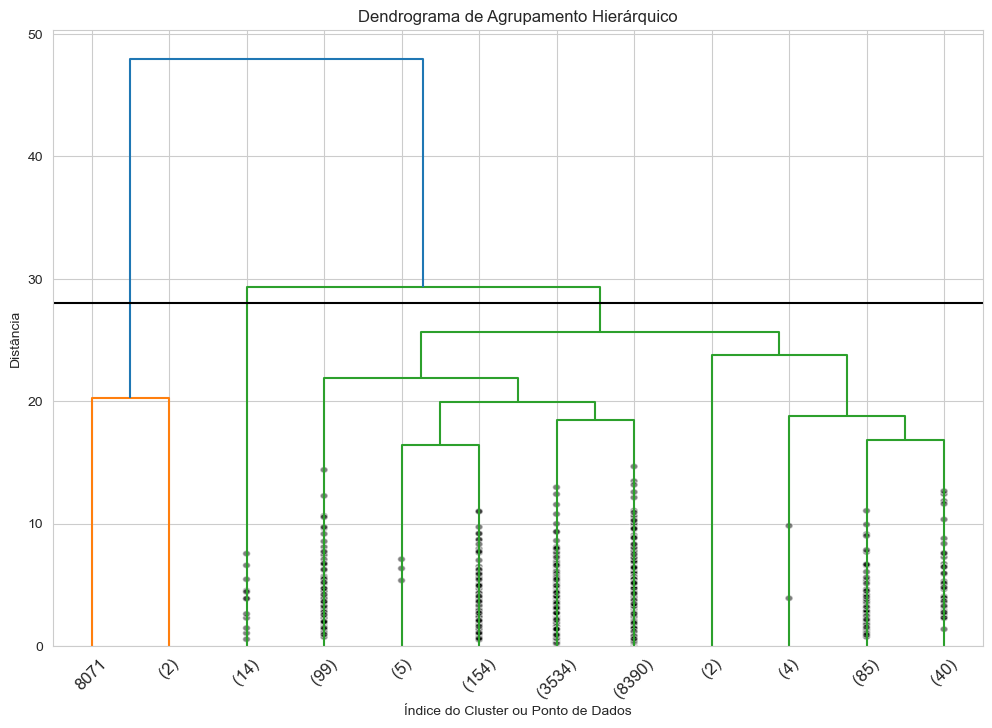

In [17]:
# Realizando o agrupamento hierárquico
Z = linkage(data_selected_encoded_scaled, method='complete', metric='euclidean')

# Função para plotar o dendrograma
def plot_dendrogram(Z, max_d=None):
    plt.figure(figsize=(12, 8))
    dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
    plt.title('Dendrograma de Agrupamento Hierárquico')
    plt.xlabel('Índice do Cluster ou Ponto de Dados')
    plt.ylabel('Distância')
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()

# Plotando o dendrograma para 3 grupos
plot_dendrogram(Z, max_d=28)

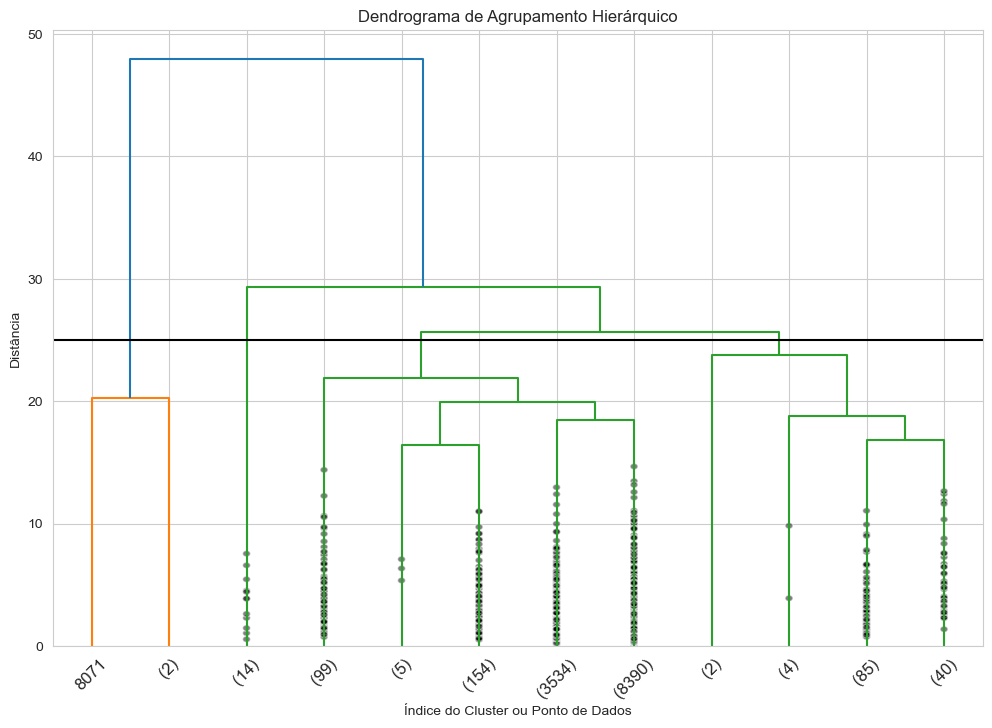

In [19]:
# Plotando o dendrograma para 4 grupos
plot_dendrogram(Z, max_d=25)

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [12]:
# Função para criar e retornar clusters
def create_clusters(Z, num_clusters):
    clusters = fcluster(Z, num_clusters, criterion='maxclust')
    return clusters

# Criando clusters para 3 e 4 grupos
clusters_3 = create_clusters(Z, 3)
clusters_4 = create_clusters(Z, 4)

# Adicionando os clusters aos dados
data_selected_encoded['Cluster_3'] = clusters_3
data_selected_encoded['Cluster_4'] = clusters_4

# Calculando a média das variáveis para cada cluster de 3 grupos
cluster_3_means = data_selected_encoded.groupby('Cluster_3').mean()

# Calculando a média das variáveis para cada cluster de 4 grupos
cluster_4_means = data_selected_encoded.groupby('Cluster_4').mean()

cluster_3_means, cluster_4_means


(           Administrative  Administrative_Duration  Informational  \
 Cluster_3                                                           
 1                2.651499                94.170458       0.604115   
 2                1.961308                64.197532       0.349566   
 3                0.139057                 3.760006       0.027811   
 
            Informational_Duration  ProductRelated  ProductRelated_Duration  \
 Cluster_3                                                                    
 1                       44.483701       36.261728              1379.632993   
 2                       15.434220       26.569046               968.642932   
 3                        0.530834        3.856106               112.999732   
 
            BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Dec  \
 Cluster_3                                                  ...              
 1             0.011453   0.032614    6.867789    0.001246  ...   0.191182   
 2             0.

### Para 3 Grupos (Clusters 1, 2, 3):

- **Cluster 1**: 
  - Maior atividade administrativa, informativa e relacionada a produtos.
  - Menores taxas de rejeição (BounceRates) e taxas de saída (ExitRates).
  - Maior valor de páginas (PageValues).
  - Mais comum em Dezembro, Março e Novembro.

- **Cluster 2**: 
  - Atividade moderada em todas as categorias.
  - BounceRates e ExitRates um pouco mais altos do que no Cluster 1.
  - Maior ocorrência em Maio (possivelmente uma característica sazonal).

- **Cluster 3**: 
  - Menor atividade em todas as categorias.
  - Altas taxas de rejeição e saída.
  - Distribuído mais uniformemente ao longo do ano, mas com picos em Fevereiro, Maio e Novembro.

### Para 4 Grupos (Clusters 1, 2, 3, 4):

- **Cluster 1**:
  - Muito alta atividade administrativa, informativa e relacionada a produtos.
  - Menores taxas de rejeição e saída.
  - Alta duração nas páginas relacionadas a produtos.
  - Mais comum em Novembro.

- **Cluster 2**:
  - Atividade moderada, similar ao Cluster 1 no cenário de 3 grupos.
  - BounceRates e ExitRates moderados.
  - Maior ocorrência em Dezembro, Março e Outubro.

- **Cluster 3**:
  - Atividade moderada, similar ao Cluster 2 no cenário de 3 grupos.
  - Maior ocorrência em Maio.

- **Cluster 4**:
  - Baixa atividade em todas as categorias, similar ao Cluster 3 no cenário de 3 grupos.
  - Altas taxas de rejeição e saída.
  - Distribuição mais uniforme ao longo do ano, com picos em Fevereiro, Maio e Novembro.

Essas características nos ajudam a entender o comportamento dos usuários em diferentes grupos. Por exemplo, o Cluster 1 (em ambos os cenários) pode representar usuários altamente engajados, enquanto o Cluster 3 (no cenário de 4 grupos) pode representar visitantes casuais com menor engajamento. Essas informações podem ser úteis para estratégias de marketing e otimização de websites.

In [13]:
# Calculando o coeficiente de silhueta para os agrupamentos de 3 e 4 grupos
silhouette_score_3 = silhouette_score(data_selected_encoded_scaled, clusters_3)
silhouette_score_4 = silhouette_score(data_selected_encoded_scaled, clusters_4)

silhouette_score_3, silhouette_score_4


(0.08966355529486547, 0.11377603376133681)

Os coeficientes de silhueta para os agrupamentos são:

Para 3 grupos: 0.090
Para 4 grupos: 0.114

Neste caso, o agrupamento com 4 grupos tem um coeficiente de silhueta maior, indicando uma melhor definição de cluster.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [14]:
# Adicionando a coluna 'Revenue' ao dataset com os clusters
data_with_clusters = df.copy()
data_with_clusters['Cluster_4'] = clusters_4

# Calculando a média de BounceRates e a proporção de Revenue para cada cluster
cluster_analysis = data_with_clusters.groupby('Cluster_4').agg({
    'BounceRates': 'mean',
    'Revenue': lambda x: (x == True).sum() / len(x)
}).rename(columns={'BounceRates': 'Average Bounce Rate', 'Revenue': 'Proportion of Purchases'})

cluster_analysis

,Average Bounce Rate,Proportion of Purchases
Cluster_4,,
1,0.006665,0.326853
2,0.011966,0.170138
3,0.014103,0.109073
4,0.161943,0.006046


Análise de "Bounce Rate" médio e a proporção de compras ("Revenue") para cada um dos 4 clusters:

- **Cluster 1**:
  - Bounce Rate Médio: 0.0067 (muito baixo)
  - Proporção de Compras: 32.69% (alta)

- **Cluster 2**:
  - Bounce Rate Médio: 0.0120 (baixo)
  - Proporção de Compras: 17.01% (moderada)

- **Cluster 3**:
  - Bounce Rate Médio: 0.0141 (moderado)
  - Proporção de Compras: 10.91% (mais baixa)

- **Cluster 4**:
  - Bounce Rate Médio: 0.1619 (muito alto)
  - Proporção de Compras: 0.60% (muito baixa)

Com base nesses resultados, o **Cluster 1** se destaca como tendo a maior proporção de compras e o menor bounce rate. Isso sugere que os clientes neste grupo são os mais propensos à compra. Eles demonstram um alto nível de engajamento com o site (conforme indicado pelo baixo bounce rate) e uma maior tendência a realizar uma compra. 

Em contraste, o **Cluster 4** possui o maior bounce rate e a menor proporção de compras, indicando um baixo engajamento e uma baixa probabilidade de conversão.